# Introduction to `numpy` and `matplotlib`

:::{note}
This material is mostly adapted from the following resources:
- [Earth and Environmental Data Science: Numpy and Matplotlib](https://earth-env-data-science.github.io/lectures/basic_scipy/numpy_and_matplotlib.html)
- [Python Programming for Data Science: Chapter 5: Introduction to NumPy](https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter5-numpy.html)
:::

This lecture will introduce NumPy and Matplotlib.
**Numpy** and **Matplotlib** are two of the most fundamental parts of the scientific python ecosystem. Most of everything else is built on top of them.


<img src="https://numpy.org/images/logo.svg" width="100px" />

**Numpy**: _The fundamental package for scientific computing with Python. NumPy is the standard Python library used for working with arrays (i.e., vectors & matrices), linear algebra, and other numerical computations._

- Website: <https://numpy.org/>
- GitHub: <https://github.com/numpy/numpy>

:::{note}
Documentation for this package is available at https://numpy.org/doc/stable/index.html.
:::

<img src="https://matplotlib.org/stable/_images/sphx_glr_logos2_003_2_00x.png" width="300px" />

**Matplotlib**: _Matplotlib is a comprehensive library for creating static and animated visualizations in Python._

- Website: <https://matplotlib.org/>
- GitHub: <https://github.com/matplotlib/matplotlib>

:::{note}
Documentation for this package is available at https://matplotlib.org/stable/index.html.
:::

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/)

Then install `numpy` and `matplotlib` by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install matplotlib numpy
```
:::

## Importing Packages

This will be our first experience with _importing_ package.

Usually we import `numpy` with the _alias_ `np`.
Matplotlib's plotting module is often imported with the alias `plt`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## NDArrays

NDarrays (short for n-dimensional arrays) are a key data structure in `numpy`. NDarrays are similar to Python lists, but they allow for fast, efficient computations on large arrays and matrices of numerical data. NDarrays can have any number of dimensions, and are used for a wide range of numerical and scientific computing tasks.

Thus, the main differences between a `numpy` array and a `list` are the following:
- `numpy` arrays can have N dimensions (while lists only have 1)
- `numpy` arrays hold values of the same datatype (e.g. `int`, `float`), while lists can contain anything.
- `numpy` optimizes numerical operations on arrays for speed and efficiency.

<img src="https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays.png" width="720px" />

Numpy arrays can be created in several ways, for example from a Python list:

In [3]:
a = np.array([9, 0, 2, 1, 0])
a


array([9, 0, 2, 1, 0])

In [4]:
b = np.array([[5, 3, 1, 9], [9, 2, 3, 0]], dtype=np.float64)
b

array([[5., 3., 1., 9.],
       [9., 2., 3., 0.]])

Two key properties of numpy arrays are their **shape** and **datatype**. The shape of an array describes its dimensions (number of rows and columns), while the datatype describes the type of data stored in the array (e.g., integers, floats, etc.). You can check the shape and datatype of a numpy array using the `.shape` and `.dtype` attributes.

In [5]:
a.dtype

dtype('int64')

In [7]:
a.shape

(5,)

In [8]:
b.dtype

dtype('float64')

In [9]:
b.shape

(2, 4)

## Creating Arrays

There are many different ways to create arrays, e.g., arrays with all zeros (`np.zeros()`), all ones (`np.ones()`), or random values (`np.random.rand()`), full arrays (`np.full()`), identity matrices (`np.eye()`), and more. `np.arange()` and `np.linspace()` are useful functions to create arrays with evenly spaced values.

In [ ]:
np.zeros((4, 4))

In [ ]:
np.ones((2, 2, 3))

In [ ]:
np.full((3, 2), np.pi)

In [ ]:
np.random.rand(4, 2)

In [ ]:
np.arange(10)

In [ ]:
np.arange(2, 4, 0.25)

In [ ]:
np.linspace(2, 4, 21)

## Indexing and Slicing

Basic indexing in `numpy` is similar to lists from standard Python. You can access individual elements of a numpy array using square brackets `[]` and the index of the element you want to access.

To get a specific element of `b`, you can use:

In [13]:
b[1, 2]

np.float64(3.0)

To get a specific row of `b`, you can use:

In [ ]:
b[0]

To get a specific column of `b`, you can use:

In [ ]:
# get some whole columns
b[:, 3]

To get a specific range of `b`, so-called slicing, you can use:

In [ ]:
b[0:2, 0:2]

## Vectorized Operations

Numpy arrays support vectorized operations, which means you can perform operations on entire arrays without the need for explicit loops. This makes computations faster and more efficient. For example, you can add, subtract, multiply, and divide arrays element-wise using standard arithmetic operators. It is particularly useful for mathematical operations on large datasets.

In [ ]:
b * 2

You can also combine arrays element-wise using operations like addition, subtraction, multiplication, and division. For example:

In [ ]:
c = np.array([[1, 2, 3, 4], [5, 6, 7, 8]], dtype=np.float64)

b + c

There is a range of different mathematical functions available in `numpy`, such as `np.sin()`, `np.cos()`, `np.exp()`, and more, which can be applied to entire arrays.

In [ ]:
np.sin(b)

To illustrate the power of vectorized operations, consider the following example where we compute the square the the first 100 million integers.

First, with a pure Python loop:

In [ ]:
import time
start = time.time()
squares = [x**2 for x in range(100_000_000)]
end = time.time()
print(f"Time taken with pure Python: {end - start:.4f} seconds")

Next, using `numpy` vectorized operations:

In [ ]:
start = time.time()
np.arange(100_000_000) ** 2
end = time.time()
print(f"Time taken with NumPy: {end - start:.4f} seconds")

## Broadcasting

Not all arrays have to be of the same shape to perform operations together. Numpy uses a powerful mechanism called **broadcasting** to make arrays with different shapes compatible for arithmetic operations. Broadcasting works by "stretching" the smaller array along the dimensions of the larger array so that they have compatible shapes, without actually copying any data.

<img src="http://scipy-lectures.github.io/_images/numpy_broadcasting.png" width="720px" />

In [ ]:
d = np.array([10, 20, 30, 40], dtype=np.float64)

b + d

Note that broadcasting follows specific rules to determine how arrays can be broadcast together.
If one arrays has fewer dimensions, `numpy` pretends it has extra dimensions of size 1 to the left side (e.g. shape `(4,)` becomes `(1, 4)`). The comparison is then made from the right to left (i.e., the last dimension is compared first). Two dimensions are compatible if they are equal, or if one of them is 1. If the dimensions are not compatible, a `ValueError` is raised.

This example works:

In [ ]:
x = np.ones((3, 4))
y = np.array([1, 2, 3, 4])
x + y

This example does not work:

In [ ]:
x = np.ones((3, 4))
y = np.array([1, 2, 3])
try:
    x + y
except ValueError as e:
    print(e)

## Reduction Operations

Reduction operations are functions that reduce the dimensions of an array by performing a specific operation along a specified axis. Common reduction operations include `sum()`, `mean()`, `min()`, `max()`, and `std()` (standard deviation). By specifying the axis parameter, you can control whether the operation is performed across rows (`axis=0`) or columns (`axis=1`).

In [ ]:
b

In [ ]:
b.sum()

In [ ]:
b.mean(axis=1)  # mean of each row

In [ ]:
b.mean(axis=0)  # mean of each column

## Boolean Masking

Often, we want to select parts of an array that meet certain conditions. This can be done using boolean masking, where we create a boolean array that indicates which elements of the original array meet the condition, and then use this boolean array to index the original array.

A comparison like `>`, `<`, or `==` produces a *boolean array* (True/False values) which we can use to filter the data.

In [ ]:
values = np.array([10, 20, 30, 40, 50])
mask = values > 25

In [ ]:
values[mask]

## Basic Plotting with Matplotlib

Let's create some hypothetical electricity demand data for 6 hours:

In [ ]:
demand = np.array([320, 340, 390, 410, 380, 360])
hours = np.arange(6)

For plotting such a 1D array as a line, we use the `plot` function.

In [ ]:
plt.plot(hours, demand)

In many cases we would want to adjust the plot, for instance, by adding labels and a title, or by changing the line style or color.

:::{note}
As described in the [colors documentation](https://matplotlib.org/stable/api/colors_api.html), there are some special codes for commonly used colors. The same applies to line styles and markers (https://matplotlib.org/api/markers_api.html).
:::

In [ ]:
plt.plot(hours, demand, marker='o', linestyle='--', color='orange', label='Demand')
plt.xlabel('Hours')
plt.ylabel('Electricity Demand (MW)')
plt.title('Electricity Demand Over 6 Hours')
plt.ylim(0, 500)
plt.legend()
plt.grid()

Potentially, we would also like to plot a bar chart instead of a line chart to visualize the electricity demand data.

In [ ]:
plt.bar(hours, demand, color='orange', label='Demand')
plt.xlabel('Hours')
plt.ylabel('Electricity Demand (MW)')
plt.title('Electricity Demand Over 6 Hours')

Suppose we want to make a scatter plot between demand data and temperature data.
This can be done using the `scatter` function, which plots the respective data points as individual markers.

In [ ]:
temp = np.array([15, 17, 20, 22, 21, 19])
plt.scatter(temp, demand, color='blue')

## Two-Dimensional Plots

For data depending on two variables, such as hour and temperature, we can use a combination of the `meshgrid` function to create a grid of coordinates, and the `pcolormesh` function to create a color-coded 2D plot.

In [ ]:
x = np.linspace(0, 24, 100)      # hours
y = np.linspace(0, 25, 50)       # temperatures
xx, yy = np.meshgrid(x, y)

In [ ]:
pv_output = np.maximum(0, np.sin(np.pi * xx / 24) * (1 - 0.02 * (25 - yy)))

plt.pcolormesh(xx, yy, pv_output, cmap="plasma")
plt.xlabel("Hour")
plt.ylabel("Temperature [°C]")
plt.title("PV Output")
plt.colorbar(label="Relative Power [per-unit]")

:::{note}
There are many different colormaps available in `matplotlib`: https://matplotlib.org/stable/tutorials/colors/colormaps.html
:::

## Figures and Axes

Every plot created with `matplotlib` is contained within a **figure** and one or more **axes**.
Each axis represents a single plot within the figure, and can contain multiple elements such as lines, markers, and labels. Think of it as the canvas (figure) and the individual paintings (axes) on that canvas.

To create a figure with one axis, run:

In [ ]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2], [10, 20, 25])
ax.plot([0, 1, 2], [15, 18, 22])

A figure can also contain multiple axes (subplots). This can be useful for comparing multiple plots side by side or in a grid layout. You can create multiple subplots using the `subplots` function and specifying the number of rows and columns.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].plot([0, 1, 2], [10, 20, 25])
axes[0].set_title('First Plot')
axes[1].plot([0, 1, 2], [15, 18, 22])
axes[1].set_title('Second Plot')

## Exercises

1. Create an array with hourly demands 200, 220, 240, 260, 280, and 300 MW. Print its shape and datatype.
2. Create ten evenly spaced temperature values between 15 and 25 degrees Celsius using `np.linspace()`.
3. Print the first 3 values and the last 3 values of the following array:

    ```python
    demand = np.array([300, 320, 340, 360, 380, 400, 420, 440, 460, 480])
    ```

4. Convert the following `temperature` array to a heating energy demand using the formula demand = 1000 - 20 * temperature.

    ```python
    temperature = np.array([10, 12, 15, 20, 25])
    ```

5. You have daily demand demand data for 3 days and 3 hours

    ```python
    demand = np.array([[300, 320, 340],
                       [280, 300, 310],
                       [260, 270, 290]])
    ```

    Multiply each hour (columns) by scaling factors 0.9, 1.0, and 1.1 respectively using broadcasting.
    What are the dimensions and values of the resulting array? What do the new values represent?

6. Consider the following values of hourly wind speeds in m/s.

    ```python
    wind_speeds = np.array([5, 10, 15, 20, 25])
    ```

    Calculate the average wind speed, minimum wind speed, and maximum wind speed using reduction operations.

7. Consider the following values for demand and generation for 8 hours.

    ```python
    demand = np.array([400, 420, 450, 480, 500, 520, 550, 580])
    generation = np.array([300, 350, 400, 450, 480, 500, 530, 600])
    ```

    Create two line plots on the same figure showing both demand and generation over time. Add appropriate labels and a legend.

8. Sometimes we want to compare two different variables side by side. Use subplots to visualize the following demand and price time series over six hours.

    ```python
    demand = np.array([300, 320, 340, 360, 380, 400])
    price = np.array([50, 55, 60, 65, 70, 75])
    ```

    Create one figure with two subplots arranged in one row and two columns. The first subplot should show demand over time, and the second subplot should show price over time. Add appropriate titles and labels to each subplot and enable grid lines.

In [10]:
hourly_demands = np.array([200, 220, 240, 260, 280, 300])
print(hourly_demands.dtype)
print(hourly_demands.shape)

int64
(6,)


In [3]:
temperatures = np.linspace(15, 25, 11)
temperatures

array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [15]:
demand = np.array([300, 320, 340, 360, 380, 400, 420, 440, 460, 480])
print(demand[0:3])

[300 320 340]


In [4]:
temperature = np.array([10, 12, 15, 20, 25])
1000 - 20*temperature

array([800, 760, 700, 600, 500])

In [5]:
demand = np.array([[300, 320, 340],
                    [280, 300, 310],
                    [260, 270, 290]])
factors = np.array([0.9, 1.0, 1.1])
scaled = demand * factors
scaled

array([[270., 320., 374.],
       [252., 300., 341.],
       [234., 270., 319.]])

In [ ]:
wind_speeds = np.array([5, 10, 15, 20, 25])
wind_speeds.mean()

np.float64(15.0)

In [ ]:
wind_speeds.min()

np.int64(5)

In [11]:
wind_speeds.max()

np.int64(25)

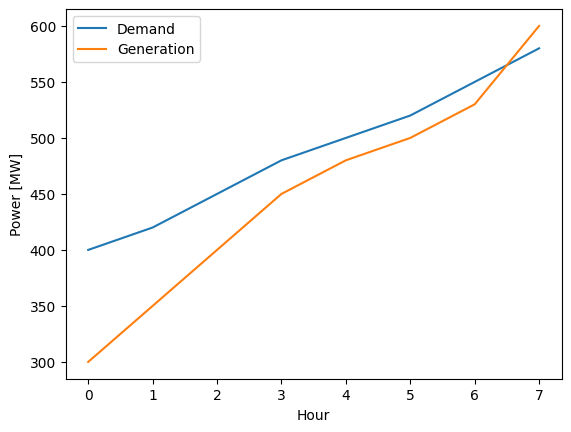

In [12]:
demand = np.array([400, 420, 450, 480, 500, 520, 550, 580])
generation = np.array([300, 350, 400, 450, 480, 500, 530, 600])

hours = np.arange(8)
plt.plot(hours, demand, label="Demand")
plt.plot(hours, generation, label="Generation")
plt.xlabel("Hour")
plt.ylabel("Power [MW]")
plt.legend()

In [ ]:
demand = np.array([300, 320, 340, 360, 380, 400])
price = np.array([50, 55, 60, 65, 70, 75])

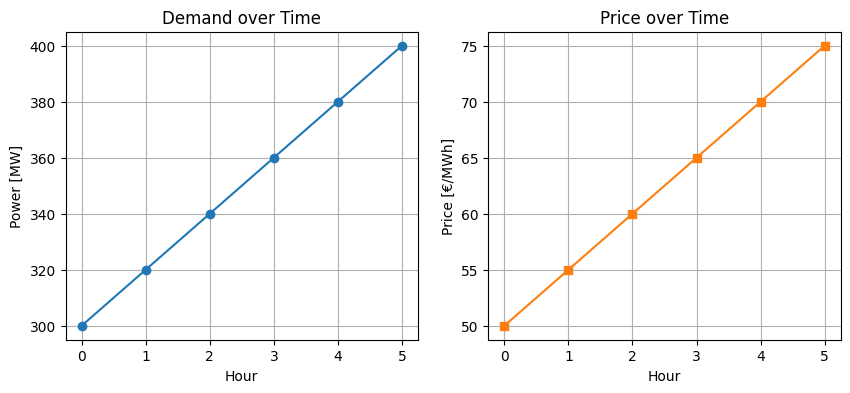

In [15]:
hours = np.arange(6)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(hours, demand, marker="o", color="tab:blue")
axes[0].set_title("Demand over Time")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Power [MW]")
axes[0].grid(True)

axes[1].plot(hours, price, marker="s", color="tab:orange")
axes[1].set_title("Price over Time")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Price [€/MWh]")
axes[1].grid(True)